# The Battle of Neighborhoods (Parts I and II)

#####  By: Aminath Shausan

## Part I

### Background

As we hit  halfway point in 2020,   this year appears challenging to the residents of Queensland, Australia. With the experience of fires and floods in the beginning of the year and currently the spread of Coronavirus (COVID-19), there are so many uncertainities in  the share market. Meanwhile the Government and  the Reserve Bank of Australia have quickly taken  steps to reduce interest rates and introduced huge stimulus packages to combat these issues, how is COVID-19 affecting the property market in Brisbane? 

According to research by Hunter Galloway (https://www.huntergalloway.com.au/), the property market in Brisbane has shown a strong start at the beginning of 2020 and with a very strong housing affordability compared to Sydney and Melbourne. The current price to income ratio required to buy a house in Brisbane is 5.3 times at a median house price of $524,000. However, not all Brisbane suburbs are equally competitive for home buyers when it comes to long term investment. As per the above mentioned research, some suburbs such as Greenslope, Strathpine, Ferny Hills, Kedron, Oxley, Caloundra   are expected to shine in the property market due to their proximity to the Brisbane CBD. Whilst proximity to Brisbane CBD is a criterior for high demand for home buyers, those who have school aged children prefer to buy houses in a school catchman with a high school rank.  Suprisingly, there are some suburbs such as Brisbane CBD, Milton, Kangaroo Point at a risk for investors as some banks may apply stricter criteria to loans, which could reduce rental income and may ask for more deposit.

### The Problem

With the above observation that not every suburb in Brisbane is  equally competitive for investment, I aim to apply machine learning tools to assist people who would want to invest in Brisbane housing market to make a sound decision.  The specific business problem which I intend to answer is: which suburbs in Brisbane are suitable for investment in this uncertain economic and pandamic situation?    

In order to solve this problem, I am going to cluster Brisbane suburbs, in the Greater Brisbane area, based on current real estate median  house prices,  venues and essential facilities such as schools, cafes, hospitals and grocery stores in those suburbs.  This clustering will provide a means to determine which suburbs are best livable according to their median house prices and venues and thus can be recommended to investors.   

This problem maybe an important decision making problem for investors, real estate agents, banks, loan lenders, and anyone who is interested to find about Brisbane property market trends. 
  

### Description of Data and its Application

Median house value data on the top 1408 Queensland suburbs are extracted from http://house.speakingsame.com/ website. This dataset consists of three columns; Rank, Suburb, Value. The 'Rank' column corresponds to the rank of the each suburb according to its median house price (corresponding to the 'Value' column) and the 'Suburb' column provides the name of the suburb. From this dataset, those rows corresponding to the Greater Brisbane suburbs are filtered. The names of the Greater Brisbane suburbs are collected from Wikipedia (https://en.wikipedia.org/wiki/List_of_Brisbane_suburbs).   

In the next step, Python's 'geopy' package is used to add location of each Brisbane suburbs.  Then FourSquare API is used to extract venues and essential facilities in each suburb and then this data is merged with the Brisbande house price dataset. Finaly, by performing a k-means clustering on this combined dataset, we will be able to recommend suitable and profitable suburbs to investors.   

### Methodology 

This section describes the data collection and preprocessing, the analysis  and prediction parts. It comprises of the following subsections 

1. Data collection and its Study:- webscrape house price data on the top 1408 Queensland suburbs from http://house.speakingsame.com/ and filter those corresponding to Greater Brisbane suburbs given in https://en.wikipedia.org/wiki/List_of_Brisbane_suburbs. Note that the data on all Queensland suburbs is contained in 28 webpages. View the first five rows and size of dataset, rename columns
2. Exploratory analysis:- compare average median hosue price for all 5 areas in the Greater Brisbane region using a bar graph. 
3. Preprocessing data:- add suburb location data, produce a map containing suburbs and prices (may need to restrict data to specific budget if required), extract venue  and essential facilities information from FourSquare API, perform onehot encoding.
4. Modelling :- perform k-means clustering
5. Prediction:- determine top 10 or 5 clusters


#### 1.  Data Collection and its Study 

In this subsection, the median house price data for 1408 Queensland suburbs are collected by  webscraping 28 websites corresponding to  http://house.speakingsame.com/. I will first demonstrate how to collect this data from the first webpage (http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page=0) and filter those data corresponding to the Greater Brisbane suburbs, so that it is easier to learn the structure of the dataset. I will then use a 'for'  loop which runs through this process for all 28 webpages. 

Let me first import the required Python libraries for this process.

In [3]:
#import required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

A list of Greater Brisbane suburbs is also required. This list is constructed using the list of Greater Brisbane suburbs given in https://en.wikipedia.org/wiki/List_of_Brisbane_suburbs, which distinguishes Greater Brisbane suburbs into 5 categories; inner, northern, southern, eastern and western suburbs. There are altogether 192 suburbs in this list.

In [4]:
#create a list of  suburb names of Greater Brisbane
inner_sub = ['Bowen Hills',  'Brisbane', 'East Brisbane', 'Fortitude Valley', 'Herston', 'Highgate Hill', 'Kangaroo Point', 'Kelvin Grove', 
             'New Farm', 'Newstead', 'Paddington', 'Petrie Terrace', 'Red Hill', 'South Brisbane', 'Spring Hill', 'Teneriffe', 'West End', 
             'Woolloongabba']

north_sub = ['Albion', 'Alderley', 'Ascot', 'Aspley', 'Bald Hills', 'Banyo', 'Boondall', 'Bracken Ridge', 'Bridgeman Downs', 'Brighton',
             'Brisbane Airport', 'Carseldine', 'Chermside', 'Chermside West', 'Clayfield',  'Deagon', 'Eagle Farm', 'Everton Park', 'Ferny Grove',
             'Fitzgibbon', 'Gaythorne', 'Geebung', 'Gordon Park', 'Grange', 'Hamilton', 'Hendra', 'Kalinga', 'Kedron', 'Keperra', 'Lutwyche', 
             'McDowall', 'Mitchelton', 'Myrtletown', 'Newmarket', 'Northgate', 'Nudgee', 'Nudgee Beach', 'Nundah', 'Pinkenba', 'Sandgate',
             'Shorncliffe', 'Stafford', 'Stafford Heights', 'Taigum', 'Virginia', 'Wavell Heights', 'Wilston', 'Windsor', 'Wooloowin', 'Zillmere']

south_sub = ['Acacia Ridge', 'Algester', 'Annerley', 'Archerfield', 'Burbank', 'Calamvale', 'Coopers Plains', 'Darra', 'Doolandella', 
             'Drewvale', 'Durack', 'Dutton Park', 'Eight Mile Plains', 'Ellen Grove', 'Fairfield', 'Forest Lake', 'Greenslopes', 'Heathwood', 
             'Holland Park', 'Holland Park West', 'Inala', 'Karawatha', 'Kuraby', 'Larapinta', 'MacGregor', 'Mackenzie', 'Mansfield', 'Moorooka', 
             'Mount Gravatt', 'Mount Gravatt East', 'Nathan', 'Pallara', 'Parkinson', 'Richlands', 'Robertson', 'Rochedale', 'Rocklea', 
             'Runcorn', 'Salisbury', 'Seventeen Mile Rocks',  'Sinnamon Park', 'Stones Corner', 'Stretton', 'Sumner', 'Sunnybank',
             'Sunnybank Hills', 'Tarragindi',  'Tennyson', 'Upper Mount Gravatt', 'Wacol', 'Willawong',  'Wishart', 'Yeerongpilly', 'Yeronga']

east_sub = ['Balmoral', 'Belmont', 'Bulimba', 'Camp Hill', 'Cannon Hill', 'Carina', 'Carina Heights', 'Carindale', 'Chandler', 'Coorparoo', 
            'Gumdale', 'Hawthorne', 'Hemmant', 'Lota', 'Lytton', 'Manly', 'Manly West', 'Moreton Island', 'Morningside', 'Murarrie', 
            'Norman Park', 'Port of Brisbane', 'Ransome', 'Seven Hills', 'Tingalpa', 'Wakerley', 'Wynnum', 'Wynnum West']

west_sub = ['Anstead', 'Ashgrove', 'Auchenflower', 'Bardon', 'Bellbowrie', 'Brookfield', 'Chapel Hill', 'Chelmer', 'Chuwar', 'Corinda', 'Enoggera', 
            'Enoggera Reservoir', 'Fig Tree Pocket', 'Graceville', 'Indooroopilly', 'Jamboree Heights' , 'Jindalee', 'Karana Downs', 
            'Kenmore', 'Kenmore Hills', 'Kholo', 'Lake Manchester', 'Middle Park', 'Milton', 'Moggill', 'Mount Coot-tha', 'Mount Crosby', 
            'Mount Ommaney', 'Oxley', 'Pinjarra Hills', 'Pullenvale', 'Riverhills', 'Seventeen Mile Rocks', 'Sherwood', 'Sinnamon Park', 
            'St Lucia', 'Taringa', 'The Gap', 'Toowong', 'Upper Brookfield', 'Upper Kedron', 'Westlake']

#check length of the list 
#print(len(inner_sub), len(north_sub), len(south_sub), len(east_sub), len(west_sub))

#join the list of suburbs into one list 
sub_list  = inner_sub + north_sub + south_sub + east_sub + west_sub
print(len(sub_list))

192


Now lets read data on median house prices from the first webpage (http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page=0) and inspect its size and the first 5 rows.

In [5]:
#read the table in the http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page=0

df = pd.read_html('http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page=0')[5]

#check size and 1st few rows
print(df.shape)
print(df.head(5))

(51, 3)
      0                  1           2
0  Rank             Suburb       Value
1     1     Jollys Lookout  $2,999,900
2     2  Sovereign Islands  $2,677,700
3     3      Mermaid Beach  $2,183,600
4     4     Sunshine Beach  $1,977,300


There are 51 rows and 3 columns in this dataframe. Notice that row 0 actually contains the column names in the actual dataset. So we will rename the columns with these names and drop row 0. This implies that the actual dataframe will consist of 50 rows and 3 columns

In [6]:
#rename columns as 'Rank', 'Suburb', 'Value' and drop the first row
df.columns = ['Rank', 'Suburb', 'Value']
df.drop(df.index[0], inplace=True)
  
#check size and 1st few rows
print(df.shape)
print(df.head())   

(50, 3)
  Rank             Suburb       Value
1    1     Jollys Lookout  $2,999,900
2    2  Sovereign Islands  $2,677,700
3    3      Mermaid Beach  $2,183,600
4    4     Sunshine Beach  $1,977,300
5    5    Cooroy Mountain  $1,946,600


In [7]:
#check which suburbs in df 'Suburb' columns are also in sub_list 

df_sub = df['Suburb'].tolist()
#set(df_sub).intersection(sub_list)
com_sub = set(df_sub) & set(sub_list)
print(len(com_sub))    #There   are 22 common suburbs names in both lists
print(len(df_sub))

23
50


Lets filter, from df dataframe, those suburbs containing in the list sub_list

In [8]:
#filter suburbs in df which corresponds to those in sub_list
df1 = df.query('Suburb in @sub_list')
#df1 = df.loc[(df['Suburb'].isin(sub_list))] 

#check size and 1st few rows
print(df1.shape)
print(df1.head())   


(23, 3)
   Rank     Suburb       Value
10   10  Willawong  $1,552,100
12   12   New Farm  $1,424,100
14   14    Burbank  $1,420,000
16   16  Teneriffe  $1,401,200
17   17    Chelmer  $1,383,700


Now, I will write a 'for' loop which does the above process for the 28 webpages containing required data. The urls for each webpage differs by the last number, with the first webpage url ending with 0 (http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page=0), and incrementing by 1 for the next webpage, and the last webpage ending with number 28.   

In [9]:
#webscrap all 28 webpages, filter data, according to suburb names in sub_list
urls = {page_number:'http://house.speakingsame.com/suburbtop.php?sta=qld&cat=HomePrice&name=&page={}'.format(page_number) 
            for page_number in list(range(0, 29))}


dfs ={}       # a dictionary to hold the original (unfiltered) dataframes
dfnew = {}    # a dictionary to hold the filtered dataframes

for url in range(0,len(urls)):
    dfs[url]= (pd.read_html(urls[url])[5])             # read data from webpage
    dfs[url].columns = ['Rank', 'Suburb', 'Value']     # rename columns
    dfs[url].drop(dfs[url].index[0], inplace=True)     # drop the first row
    dfnew[url] = dfs[url].query('Suburb in @sub_list') # filter according to suburb names in the sub_list    


Check if the size and first 5 rows of dfnew[0] matches with that of df1, whose size is 22 rows and 3 columns

In [10]:
#check if size and 1st 5 rows of dfnew[1] matches with that of df1 above
print(dfnew[0].shape)
print(dfnew[0].head())  


(23, 3)
   Rank     Suburb       Value
10   10  Willawong  $1,552,100
12   12   New Farm  $1,424,100
14   14    Burbank  $1,420,000
16   16  Teneriffe  $1,401,200
17   17    Chelmer  $1,383,700


Since the size and first 5 rows of df1 and dfnew[0] are the same, it can be safely assumed that the for loop is correctly extracting data corresponding to those suburbs in sub_list list. Thus, we can now combine all dataframes in the dictionary 'dfnew' into a single dataframe.  

In [11]:
#merge all dataframes in dfnew dictionary vertically 

brisbane_df = pd.concat(dfnew.values(), ignore_index=True)
print(brisbane_df.shape)
print(brisbane_df.head())
#print(type(brisbane_df.Value))

(178, 3)
  Rank     Suburb       Value
0   10  Willawong  $1,552,100
1   12   New Farm  $1,424,100
2   14    Burbank  $1,420,000
3   16  Teneriffe  $1,401,200
4   17    Chelmer  $1,383,700


Note that the dataframe 'brisbane_df' contains data on 178 suburbs which means that not all suburb median prices in the Greater Brisbane region are given in the webpages  http://house.speakingsame.com/. Thus for illustration purpose and considering time to manually enter house prices for those suburbs not included in the sub_list list, I will analyse data only for those  suburbs in the brisbane_df. 

## Part II

#### 2. Exploratory Data Analysis
In this subsection, I compare the average median house prices for all 5 areas (inner, northern, southern, estern and western) in the Greater Brisbane region, using a bar graph.  To compute the means for the areas, it requires that the 'Value' column be converted to float type and remove the '$' sign and commas as follows.  

In [12]:
#remove $  sign and commas from the Value column
brisbane_df['Value'] = brisbane_df.Value.str.strip('$')
brisbane_df['Value'] = brisbane_df['Value'].str.replace(',', '').astype(float)
print(type(brisbane_df.Value))
print(brisbane_df.head())


<class 'pandas.core.series.Series'>
  Rank     Suburb      Value
0   10  Willawong  1552100.0
1   12   New Farm  1424100.0
2   14    Burbank  1420000.0
3   16  Teneriffe  1401200.0
4   17    Chelmer  1383700.0


In [13]:
#write this dataframe as a csv file for later use 
#brisbane_df.to_csv(file_name = 'Brisbane_house_price' , sep='\t', encoding='utf-8', index = False)
brisbane_df.to_csv(r'C:Users\shau\Desktop\export_dataframe.csv', sep='\t', encoding='utf-8', header='true', index = False) #did not work
brisbane_df.to_csv(r'./export_dataframe.csv', sep='\t', encoding='utf-8', header='true', index = False) #did not work

Next, we create a dataframe with average median house prices for the 5 Brisbane areas and plot this data showing this data.

In [14]:
#create a dataframe consisting with average median house price for the regions: inner, noth, south, east,  west suburbs
#and  plot a bargraph of these averages  

#north_df =  brisbane_df.query('Suburb in @north_sub')
inner_mean = brisbane_df.query('Suburb in @inner_sub').Value.mean()
north_mean = brisbane_df.query('Suburb in @north_sub').Value.mean()
south_mean = brisbane_df.query('Suburb in @south_sub').Value.mean()
east_mean = brisbane_df.query('Suburb in @east_sub').Value.mean()
west_mean = brisbane_df.query('Suburb in @west_sub').Value.mean()
#print(north_df['Value'].mean(), north_mean)
#print(inner_mean, north_mean, south_mean, east_mean, west_mean)
#print(north_df.shape)
#print(north_df.head())

mean_df = pd.DataFrame({'Areas':['Inner', 'Northern', 'Southern', 'Eastern', 'Western'],
                        'Avg_Value':[inner_mean, north_mean, south_mean, east_mean, west_mean]})
print(mean_df)

      Areas      Avg_Value
0     Inner  956611.111111
1  Northern  733843.478261
2  Southern  678198.039216
3   Eastern  853923.076923
4   Western  824487.179487


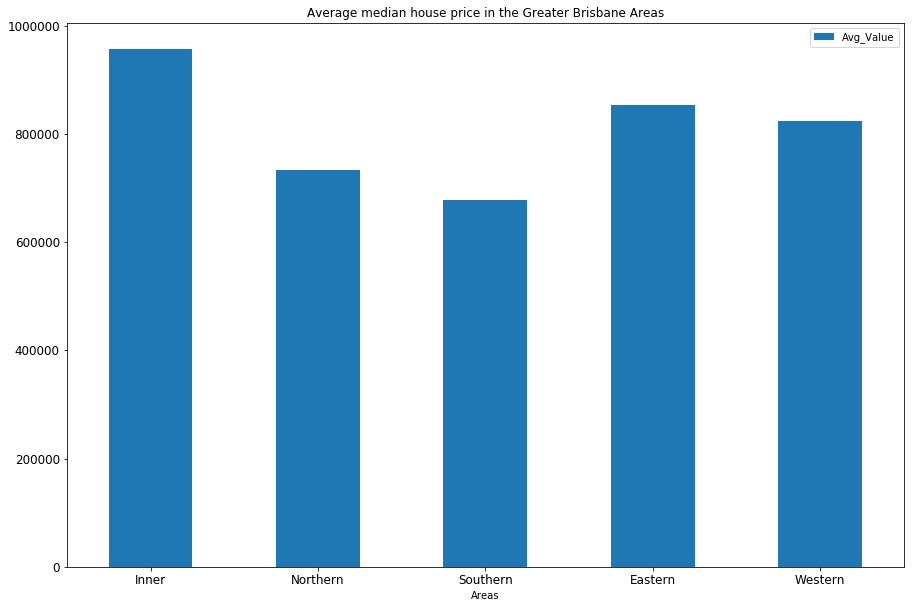

In [17]:
ax = mean_df.plot.bar(x='Areas', y='Avg_Value', rot=0, title ="Average median house price in the Greater Brisbane Areas", figsize=(15, 10),  fontsize=12)
ax

It appears that the inner Brisbane suburbs have the highest median hosue price on average with about \\$955 thousand followed by the eastern and western suburbs with  about  \\$857 thousand and \\$814 thousand, respectively. The lowest perfoming suburbs are in the southern area with average median house price of about   \\$675 thousand. 

### 2. Preprocess Data 
In this subsection, I use the _geopy_ package of Python to add location of suburbs given in the *brisbane_df*, and then produce a map containing suburbs and their median house prices (may need to restrict data to specific budget if required).  Next, I extract venue and essential facilities information from FourSquare API and perform onehot encoding, to aid with modelling.

In [19]:
#get location of all suburbs in the form (latitude, longitude)
geolocator = Nominatim(user_agent="ny_explorer")
brisbane_df['suburb_coord'] = brisbane_df['Suburb'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

#address = 'Tronto, Canada'

#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))
#location   

In [20]:
brisbane_df[['Latitude', 'Longitude']] = brisbane_df['suburb_coord'].apply(pd.Series)
brisbane_df = brisbane_df.drop(columns = ['suburb_coord'])
print(brisbane_df.head())


  Rank     Suburb      Value   Latitude   Longitude
0   10  Willawong  1552100.0 -27.598098  153.005894
1   12   New Farm  1424100.0  53.524562   -0.642671
2   14    Burbank  1420000.0  34.181648 -118.325855
3   16  Teneriffe  1401200.0 -27.456976  153.046518
4   17    Chelmer  1383700.0 -27.512229  152.974408


In [17]:
#brisbane_df = brisbane_df.drop(columns = ['suburb_coord'])
#print(brisbane_df.head())

In [21]:
#get location of Brisbane city
address = 'Brisbane, Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London City are -27.4689682, 153.0234991.


In [22]:
# create map of Brisbane using latitude and longitude values
map_brisbane = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, value, suburb in zip(brisbane_df['Latitude'], brisbane_df['Longitude'], brisbane_df['Value'], brisbane_df['Suburb']):
    label = '{}, {}'.format(suburb, value)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brisbane)  
    
map_brisbane

In [23]:
# The code was removed by Watson Studio for sharing.

In [42]:
#create dataframes corresponding to inner, outer, noth, east, south, west suburbs and compute average median house price
#d = {
#    'Name':['a','b','c'],
#   'Score1':[1552100, 1443500, 1401200]}
#df = pd.DataFrame(d) 
#df['Score2'] = brisbane_df.Value[:3]
#df['Score2'] = df['Score2'].str.replace(',', '').astype(float)
#df["Score2"] = pd.to_numeric(df["Score2"])
#print(df['Score1'].mean(), df['Score2'].mean())

#new_values = brisbane_df.Value[:2]
#print(type(df.Score2))
#df
#new_values
#new_values.mean()
#df.index.astype(str).str[:2]


### 3. Modelling

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
# Run the above function on each location and create a new dataframe called location_venues and display it.
brisbane_venues = getNearbyVenues(names=brisbane_df['Suburb'],
                                   latitudes=brisbane_df['Latitude'],
                                   longitudes=brisbane_df['Longitude'])

Willawong
New Farm
Burbank
Teneriffe
Chelmer
Hamilton
Ascot
Ransome
Fig Tree Pocket
Chandler
Hawthorne
Gumdale
Pullenvale
St Lucia
Tennyson
Paddington
Bulimba
South Brisbane
Highgate Hill
Hendra
Brookfield
Toowong
Clayfield
Fortitude Valley
Upper Brookfield
Shorncliffe
East Brisbane
Rochedale
Windsor
Indooroopilly
Coorparoo
Bardon
Balmoral
Robertson
Kangaroo Point
Newmarket
Graceville
Auchenflower
Ashgrove
Norman Park
Wilston
Stretton
Grange
Camp Hill
Dutton Park
Manly
Alderley
Albion
Seven Hills
Fairfield
Wooloowin
Kenmore Hills
Gordon Park
Carindale
Mount Ommaney
Taringa
Milton
West End
Corinda
Sherwood
Woolloongabba
Tarragindi
Yeerongpilly
Holland Park
Chapel Hill
Red Hill
Kelvin Grove
Wavell Heights
Spring Hill
Newstead
Cannon Hill
Holland Park West
Petrie Terrace
Mackenzie
Greenslopes
Wakerley
The Gap
Bridgeman Downs
Morningside
MacGregor
Northgate
Belmont
Wishart
Nudgee Beach
Kedron
Yeronga
Sandgate
Sunnybank
Sinnamon Park
Annerley
Kenmore
Enoggera
Bowen Hills
Mansfield
Westlake


In [31]:
print(brisbane_venues.shape)
brisbane_venues.head()

(1840, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Willawong,-27.598098,153.005894,Unidus Book Cafe,-27.596096,153.007834,Café
1,Burbank,34.181648,-118.325855,Santoro's Submarine Sandwiches,34.182351,-118.327926,Deli / Bodega
2,Burbank,34.181648,-118.325855,Half Baked Co.,34.183009,-118.324820,Bakery
3,Burbank,34.181648,-118.325855,Alfredo's Granada,34.184100,-118.324320,Mexican Restaurant
4,Burbank,34.181648,-118.325855,Costco Food Court,34.185719,-118.323953,Fast Food Restaurant


Let's check how many venues were returned for each neighborhood

In [32]:
brisbane_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Acacia Ridge,5,5,5,5,5,5
Algester,1,1,1,1,1,1
Annerley,19,19,19,19,19,19
Anstead,1,1,1,1,1,1
Archerfield,1,1,1,1,1,1
Ascot,13,13,13,13,13,13
Aspley,4,4,4,4,4,4
Auchenflower,7,7,7,7,7,7
Bellbowrie,8,8,8,8,8,8


Let's find out how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} uniques categories.'.format(len(brisbane_venues['Venue Category'].unique())))

There are 282 uniques categories.


##### Analysing  each suburb and one-hot encoding 

In [46]:
# one hot encoding
brisbane_onehot = pd.get_dummies(brisbane_venues[['Venue Category']], prefix="", prefix_sep="")

# add suburb column back to dataframe
brisbane_onehot['Suburb'] = brisbane_venues['Suburb'] 

# move suburb column to the first column
fixed_columns = [brisbane_onehot.columns[-1]] + list(brisbane_onehot.columns[:-1])
brisbane_onehot = brisbane_onehot[fixed_columns]

#examine the new dataframe size and 1st 5 rows
print(brisbane_onehot.shape)
print(brisbane_onehot.head())

(1840, 283)
      Suburb  ATM  African Restaurant  American Restaurant  Antique Shop  \
0  Willawong    0                   0                    0             0   
1    Burbank    0                   0                    0             0   
2    Burbank    0                   0                    0             0   
3    Burbank    0                   0                    0             0   
4    Burbank    0                   0                    0             0   

   Aquarium  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0         0       0            0           0                    0   
1         0       0            0           0                    0   
2         0       0            0           0                    0   
3         0       0            0           0                    0   
4         0       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   

Next, let's group rows by suburbs and by taking the mean of the frequency of occurrence of each category

In [35]:
brisbane_grouped = brisbane_onehot.groupby('Suburb').mean().reset_index()

#find the size and first few rows
print(brisbane_grouped.shape)
print(brisbane_grouped.head())

(135, 283)
         Suburb  ATM  African Restaurant  American Restaurant  Antique Shop  \
0  Acacia Ridge  0.0                 0.0                  0.0           0.0   
1      Algester  0.0                 0.0                  0.0           0.0   
2      Annerley  0.0                 0.0                  0.0           0.0   
3       Anstead  0.0                 0.0                  0.0           0.0   
4   Archerfield  0.0                 0.0                  0.0           0.0   

   Aquarium  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0.0     0.0          0.0         0.0                  0.0   
1       0.0     0.0          0.0         0.0                  0.0   
2       0.0     0.0          0.0         0.0                  0.0   
3       0.0     0.0          0.0         0.0                  0.0   
4       0.0     0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0  

Let's print each suburb along with the top 5 most common venues

In [36]:
num_top_venues = 5

for suburb in brisbane_grouped['Suburb']:
    print("----"+suburb+"----")
    temp = brisbane_grouped[brisbane_grouped['Suburb'] == suburb].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acacia Ridge----
                  venue  freq
0  Fast Food Restaurant   0.2
1        Sandwich Place   0.2
2                   Pub   0.2
3                  Pool   0.2
4    Mexican Restaurant   0.2


----Algester----
                  venue  freq
0                Market   1.0
1                   ATM   0.0
2                Office   0.0
3                  Park   0.0
4  Outdoor Supply Store   0.0


----Annerley----
            venue  freq
0            Café  0.11
1      Restaurant  0.05
2   Train Station  0.05
3    Dance Studio  0.05
4  Sandwich Place  0.05


----Anstead----
                  venue  freq
0                  Café   1.0
1                   ATM   0.0
2             Pawn Shop   0.0
3                  Park   0.0
4  Outdoor Supply Store   0.0


----Archerfield----
                    venue  freq
0  Furniture / Home Store   1.0
1            Noodle House   0.0
2                    Park   0.0
3    Outdoor Supply Store   0.0
4       Outdoor Sculpture   0.0


----Ascot----
         

Let's put the above categories into a pandas dataframe by using a function to sort the venues in descending order and then display top 10 venues in each suburb

In [83]:
#function to display top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
#display top 10 venues in each suburb
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = brisbane_grouped['Suburb']

for ind in np.arange(brisbane_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brisbane_grouped.iloc[ind, :], num_top_venues)

print(suburb_venues_sorted.head())

         Suburb   1st Most Common Venue 2nd Most Common Venue  \
0  Acacia Ridge                     Pub                  Pool   
1      Algester                  Market           Yoga Studio   
2      Annerley                    Café                   Pub   
3       Anstead                    Café           Yoga Studio   
4   Archerfield  Furniture / Home Store           Yoga Studio   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant        Sandwich Place    Mexican Restaurant   
1           Flea Market        Farmers Market  Fast Food Restaurant   
2  Gym / Fitness Center   Sporting Goods Shop          Dance Studio   
3           Flea Market        Farmers Market  Fast Food Restaurant   
4           Flower Shop        Farmers Market  Fast Food Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Food Court     Food & Drink Shop                  Food   
1   Filipino Restaurant     Fish & Chips

#### Cluster Neighborhoods
Run k-means to cluster the suburbs into 5 clusters.

In [48]:
# set number of clusters
kclusters = 5

brisbane_grouped_clustering = brisbane_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brisbane_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each suburb.

In [41]:
# add clustering labels
suburb_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brisbane_merged = brisbane_df

# merge brisbane_grouped with brisbane_data to add latitude/longitude for each suburb
brisbane_merged = brisbane_merged.join(suburb_venues_sorted.set_index('Suburb'), on='Suburb')

print(brisbane_merged.head()) # check the last columns!

  Rank     Suburb      Value   Latitude   Longitude  Cluster Labels  \
0   10  Willawong  1552100.0 -27.598098  153.005894             0.0   
1   12   New Farm  1424100.0  53.524562   -0.642671             NaN   
2   14    Burbank  1420000.0  34.181648 -118.325855             1.0   
3   16  Teneriffe  1401200.0 -27.456976  153.046518             1.0   
4   17    Chelmer  1383700.0 -27.512229  152.974408             1.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Café           Yoga Studio           Flea Market   
1                   NaN                   NaN                   NaN   
2                Bakery          Concert Hall                   Spa   
3                  Café           Coffee Shop        Ice Cream Shop   
4         Train Station            Playground                  Café   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0        Farmers Market  Fast Food Restaurant   Filipino Restaurant   
1   

Finally, let's visualize the resulting clusters

In [56]:
print(brisbane_merged.shape, brisbane_df.shape)
brisbane_merged.dtypes

(178, 16) (178, 5)


Rank                       object
Suburb                     object
Value                     float64
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [68]:
#Create a map of Brisbane suburbs with the clusters 

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brisbane_merged['Latitude'], brisbane_merged['Longitude'], brisbane_merged['Suburb'], brisbane_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

TypeError: list indices must be integers or slices, not float

In [69]:
#color= cm.rainbow(np.linspace(0, 1, 2))
#cluster = brisbane_merged['Cluster Labels']
#print(color)
#print(cluster[1-1])
#print(type(color))

### 4. Prediction

Now, lets examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [76]:
cluster1 = brisbane_merged.loc[brisbane_merged['Cluster Labels'] == 0, brisbane_merged.columns[[1] + list(range(5, brisbane_merged.shape[1]))]]
print(cluster1)

        Suburb  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0    Willawong             0.0                  Café           Yoga Studio   
101    Anstead             0.0                  Café           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Flea Market        Farmers Market  Fast Food Restaurant   
101           Flea Market        Farmers Market  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Filipino Restaurant     Fish & Chips Shop           Fish Market   
101   Filipino Restaurant     Fish & Chips Shop           Fish Market   

    9th Most Common Venue 10th Most Common Venue  
0             Flower Shop     Falafel Restaurant  
101           Flower Shop     Falafel Restaurant  


#### Cluster 2

In [77]:
cluster2 = brisbane_merged.loc[brisbane_merged['Cluster Labels'] == 1, brisbane_merged.columns[[1] + list(range(5, brisbane_merged.shape[1]))]]
print(cluster2)

                  Suburb  Cluster Labels    1st Most Common Venue  \
2                Burbank             1.0                   Bakery   
3              Teneriffe             1.0                     Café   
4                Chelmer             1.0            Train Station   
5               Hamilton             1.0              Coffee Shop   
6                  Ascot             1.0              Coffee Shop   
8        Fig Tree Pocket             1.0               Playground   
9               Chandler             1.0               Taco Place   
10             Hawthorne             1.0     Fast Food Restaurant   
12            Pullenvale             1.0             Liquor Store   
14              Tennyson             1.0         Business Service   
15            Paddington             1.0                    Hotel   
17        South Brisbane             1.0                     Park   
19                Hendra             1.0            Deli / Bodega   
20            Brookfield          

#### Cluster 3

In [81]:
cluster3 = brisbane_merged.loc[brisbane_merged['Cluster Labels'] == 2, brisbane_merged.columns[[1] + list(range(5, brisbane_merged.shape[1]))]]
print(cluster3)


                   Suburb  Cluster Labels 1st Most Common Venue  \
7                 Ransome             2.0          Home Service   
71      Holland Park West             2.0          Home Service   
113  Seventeen Mile Rocks             2.0          Home Service   
120            Manly West             2.0               Dog Run   
131              Drewvale             2.0          Home Service   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7             Yoga Studio           Fabric Shop                  Farm   
71            Bus Station           Yoga Studio        Farmers Market   
113           Yoga Studio           Fabric Shop                  Farm   
120          Home Service           Yoga Studio    Falafel Restaurant   
131           Yoga Studio           Fabric Shop                  Farm   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7          Farmers Market  Fast Food Restaurant   Filipino Restaurant   
71   Fast Fo

#### Cluster 4

In [80]:
cluster4 = brisbane_merged.loc[brisbane_merged['Cluster Labels'] == 3, brisbane_merged.columns[[1] + list(range(5, brisbane_merged.shape[1]))]]
print(cluster4)

                 Suburb  Cluster Labels  1st Most Common Venue  \
11              Gumdale             3.0            Bus Station   
52          Gordon Park             3.0  Portuguese Restaurant   
95       Pinjarra Hills             3.0            Bus Station   
103        Upper Kedron             3.0            Bus Station   
121  Mount Gravatt East             3.0           Liquor Store   
155    Jamboree Heights             3.0                    Gym   
163          Fitzgibbon             3.0            Bus Station   

          2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11   Construction & Landscaping           Yoga Studio           Flower Shop   
52                  Bus Station                  Park           Yoga Studio   
95                  Yoga Studio           Flower Shop        Farmers Market   
103                        Park         Garden Center           Flea Market   
121                 Bus Station           Flea Market                  Farm 

#### Cluster 5

In [82]:
cluster5 = brisbane_merged.loc[brisbane_merged['Cluster Labels'] == 4, brisbane_merged.columns[[1] + list(range(5, brisbane_merged.shape[1]))]]
print(cluster5)

         Suburb  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
70  Cannon Hill             4.0         Boat or Ferry           Yoga Studio   
87    Sunnybank             4.0         Boat or Ferry           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
70           Flower Shop        Farmers Market  Fast Food Restaurant   
87           Flower Shop        Farmers Market  Fast Food Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
70   Filipino Restaurant     Fish & Chips Shop           Fish Market   
87   Filipino Restaurant     Fish & Chips Shop           Fish Market   

   9th Most Common Venue 10th Most Common Venue  
70           Flea Market                   Food  
87           Flea Market                   Food  


##### Findout the 1st most common venues and cluster numbers  in each area of Greater Brisbane

In [107]:
#inner suburbs
inner_venues  =  suburb_venues_sorted.query('Suburb in @inner_sub')
#print(inner_venues.head())

#count the number of unique venues and cluster numbers
print(inner_venues['1st Most Common Venue'].value_counts())
print(inner_venues['Cluster Labels'].value_counts())


Café              4
Coffee Shop       3
Park              1
Pizza Place       1
Breakfast Spot    1
Hotel             1
Hostel            1
Name: 1st Most Common Venue, dtype: int64
1    12
Name: Cluster Labels, dtype: int64


In [108]:
#Estern  suburbs
east_venues  =  suburb_venues_sorted.query('Suburb in @east_sub')

#count the number of unique venues and cluster numbers
print(east_venues['1st Most Common Venue'].value_counts())
print(east_venues['Cluster Labels'].value_counts())


Coffee Shop             5
Train Station           2
Fast Food Restaurant    2
Park                    1
Home Service            1
Beach                   1
Italian Restaurant      1
Bus Station             1
Café                    1
Breakfast Spot          1
Pizza Place             1
IT Services             1
Boat or Ferry           1
Dog Run                 1
Taco Place              1
Name: 1st Most Common Venue, dtype: int64
1    17
2     2
4     1
3     1
Name: Cluster Labels, dtype: int64


In [109]:
#western suburbs
west_venues  =  suburb_venues_sorted.query('Suburb in @west_sub')

#count the number of unique venues and cluster numbers
print(west_venues['1st Most Common Venue'].value_counts())
print(west_venues['Cluster Labels'].value_counts())


Café                       4
Home Service               2
Liquor Store               2
Bus Station                2
Playground                 2
Sandwich Place             1
State / Provincial Park    1
Gym                        1
Gun Shop                   1
Pizza Place                1
Gourmet Shop               1
Restaurant                 1
Train Station              1
Coffee Shop                1
Pharmacy                   1
Medical Supply Store       1
Athletics & Sports         1
Electronics Store          1
Bar                        1
Flower Shop                1
Brewery                    1
Child Care Service         1
Light Rail Station         1
Discount Store             1
Burger Joint               1
Name: 1st Most Common Venue, dtype: int64
1    27
3     3
2     1
0     1
Name: Cluster Labels, dtype: int64


In [110]:
#northern suburbs
north_venues  =  suburb_venues_sorted.query('Suburb in @north_sub')
#print(inner_venues.head())

#count the number of unique venues and cluster numbers
print(north_venues['1st Most Common Venue'].value_counts())
print(north_venues['Cluster Labels'].value_counts())


Park                     3
Coffee Shop              3
Pub                      3
Bakery                   3
Pizza Place              2
Café                     2
Fast Food Restaurant     2
Business Service         1
Gym                      1
Dog Run                  1
Portuguese Restaurant    1
Restaurant               1
Arts & Crafts Store      1
Auto Workshop            1
Market                   1
Deli / Bodega            1
Athletics & Sports       1
Ice Cream Shop           1
Clothing Store           1
Sushi Restaurant         1
Farmers Market           1
Indian Restaurant        1
Bus Station              1
Name: 1st Most Common Venue, dtype: int64
1    32
3     2
Name: Cluster Labels, dtype: int64


In [111]:
#southern suburbs
south_venues  =  suburb_venues_sorted.query('Suburb in @south_sub')

#count the number of unique venues and cluster numbers
print(south_venues['1st Most Common Venue'].value_counts())
print(south_venues['Cluster Labels'].value_counts())


Home Service              3
Business Service          3
Gas Station               2
Pub                       2
Café                      2
Brewery                   1
Grocery Store             1
Scenic Lookout            1
Coffee Shop               1
Furniture / Home Store    1
Restaurant                1
Train Station             1
Bar                       1
Asian Restaurant          1
Video Store               1
Convenience Store         1
Liquor Store              1
Boat or Ferry             1
Beach                     1
Farm                      1
Bakery                    1
Gym                       1
American Restaurant       1
Pizza Place               1
Garden Center             1
Market                    1
Playground                1
Medical Supply Store      1
Gym Pool                  1
Platform                  1
Garden                    1
Name: 1st Most Common Venue, dtype: int64
1    32
2     3
4     1
3     1
0     1
Name: Cluster Labels, dtype: int64


### Results 

The analysis done in this report may be discussed under three main perspectives. 

Based on the average median house price in the five Greater Brisbane areas (inner, northern, southern, estern, southern), those suburbs in the inner Brisbane are the highest in value followed by the estern and western suburbs. The northern and southern suburbs are less expensive compared to those in other areas. Thus, investing in the inner, estern or western suburbs may generate a higher income if the property is sold later.  

Although Brisbane inner suburbs are expensive, it is surprising to know that the variety of first common venues is limited in this area compared to all other regions, with few cafes, hotels and parks as the most common facilities. Interestingly, the northern and southern area suburbs wich are the least expensive consists of the most variety of venues with 34 and 38 distinct venues respectively. Thus, based on this observation, in the long run, it may be profitable   to invest in the northern and southern suburbs as due to a vast variety of facilities, it is highly likely that these areas are subject to a greater population and infrastructure development. 

In terms of clustering suburbs, it is apparent that the most number of suburbs fall into cluster 2 which has the most number of facilities. This cluster contains the most number of suburbs from each area, with 32 suburbs from each of the nothern and southern areas,  27 suburbs from the western area and 12 suburbs from the inner area. Based on this clustering, it is not clear to determine which area of Brisbane is the most profitable. Surprisingly, non of the clusters list that school as its top venues, thus this result reveals that having a school nearby is not a top priority for investing. 
 

### Conclusions

Previous research by Hunter Galloway (https://www.huntergalloway.com.au/), has established that Brisbane real estate market is to shine in 2020 with some suburbs having a greater profitability compared to others due to their location and facilities. Does this trend still exist as we face through COVID-19 pandamic? This is the specific question I intended to investigate in this report. 

To examine this problem, I clustered Brisbane suburbs based on their venues and other essential fascilities in order to recommend suitable areas for investing in the housing market.  Data on median house price values for five Grater Brisbane areas (inner, nothern, southern, eastern, western)  are extracted from  http://house.speakingsame.com/  website. The FourSquare API is used to collect data on nearby venues and essential facilities of each suburb. Then the data on venues and essential facilities are merged with the hosue price data frame and k-means clustering is performed to cluster the most profitable suburbs based on the venues and price.   

Comparing the average median house price for each area, it appears that Brisbane inner suburbs are the most profitable, followed by the eastern and western suburbs. However, based on the number of venues, it may be wise to invest in the northern and southern suburbs due to their lower price and grearter veriery of facilities. Cluster 2 has the most number of suburbs in it with many distinct venues listed. However, this cluster contains many suburbs from all areas of Brisbane. Thus it is not clear from clustering which area of Brisbane is most profitable. Although it is previously observed that suburbs having a school with a  high ranking is expected to increase the demand for those suburbs, it is surprising to find out from our analysis that schools are not the top facilities for any suburbs, but suburbs having many cafes, parks, markets are on the top of the list. 
